<a href="https://colab.research.google.com/github/sandrohpsantos/public/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importar bibliotecas sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Criar DataFrame

In [3]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}
df_vendas = pd.DataFrame(dados_vendas)

In [4]:
df_vendas.head()

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600


## Tratamento dados - feature

In [6]:
# Atribuir meses em numeros ao dataset
df_vendas['nr_mes'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [7]:
df_vendas.head()

,mes,vendas,nr_mes
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5


In [8]:
# Separar conjuntos de dados
x = df_vendas[['nr_mes']]
y = df_vendas['vendas']

In [11]:
x

,nr_mes
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=51)

In [18]:
len(x_train), len(x_test), len(y_train), len(y_test)

(8, 4, 8, 4)

In [19]:
# Treinar modelo - regressão
modelo = LinearRegression().fit(x_train, y_train)

In [21]:
# Avaliar modelo
y_pred = modelo.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

In [22]:
y_pred, mse, mae, r2

(array([2420.        , 2876.66666667, 2305.83333333, 2762.5       ]),
 2096.1805555555525,
 36.66666666666663,
 0.9631440781440782)

In [23]:
modelo.intercept_, modelo.coef_

(1963.3333333333333, array([114.16666667]))

In [25]:
prev_dezembro = modelo.predict([[12]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
prev_dezembro

array([3219.16666667])

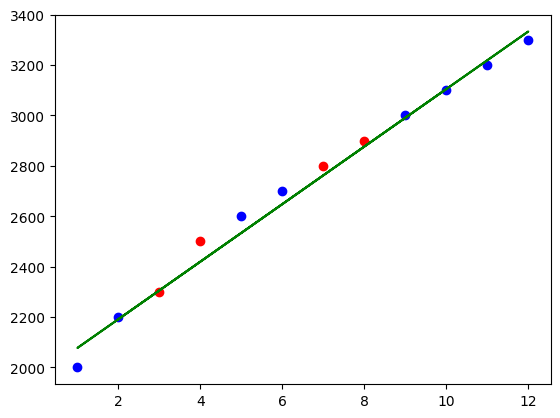

In [30]:
# Scatter
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, modelo.predict(x_train), color='green')

<Axes: xlabel='vendas', ylabel='Count'>

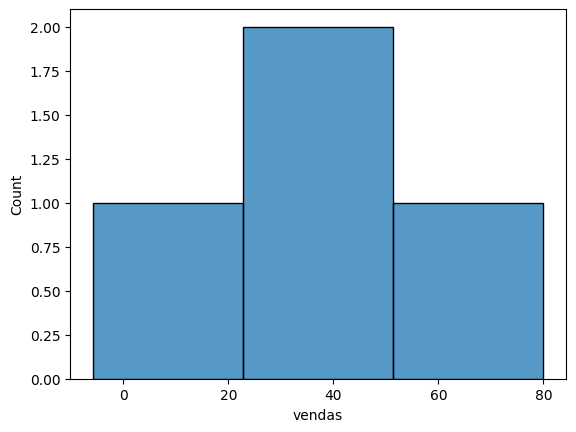

In [31]:
# Histograma
sns.histplot(y_test - y_pred)